In [1]:
import numpy as np 
import pandas as pd 
import pickle

# visualizatioion pkg 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
%config InlineBackend.figure_format='retina'

import sys
sys.path.append('..')

from utils.viz import viz 
from utils.model import *  
from utils.fig_fn import *
viz.get_style()

In [2]:
data_set = 'exp2'
models = ['rmPG_fea', 'caPG_fea', 'ecPG_fea']
method = 'map'
dpi = 300

/opt/anaconda3/envs/hcl/lib/python3.10/site-packages/seaborn/utils.py:875: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if edgecolor == "face":


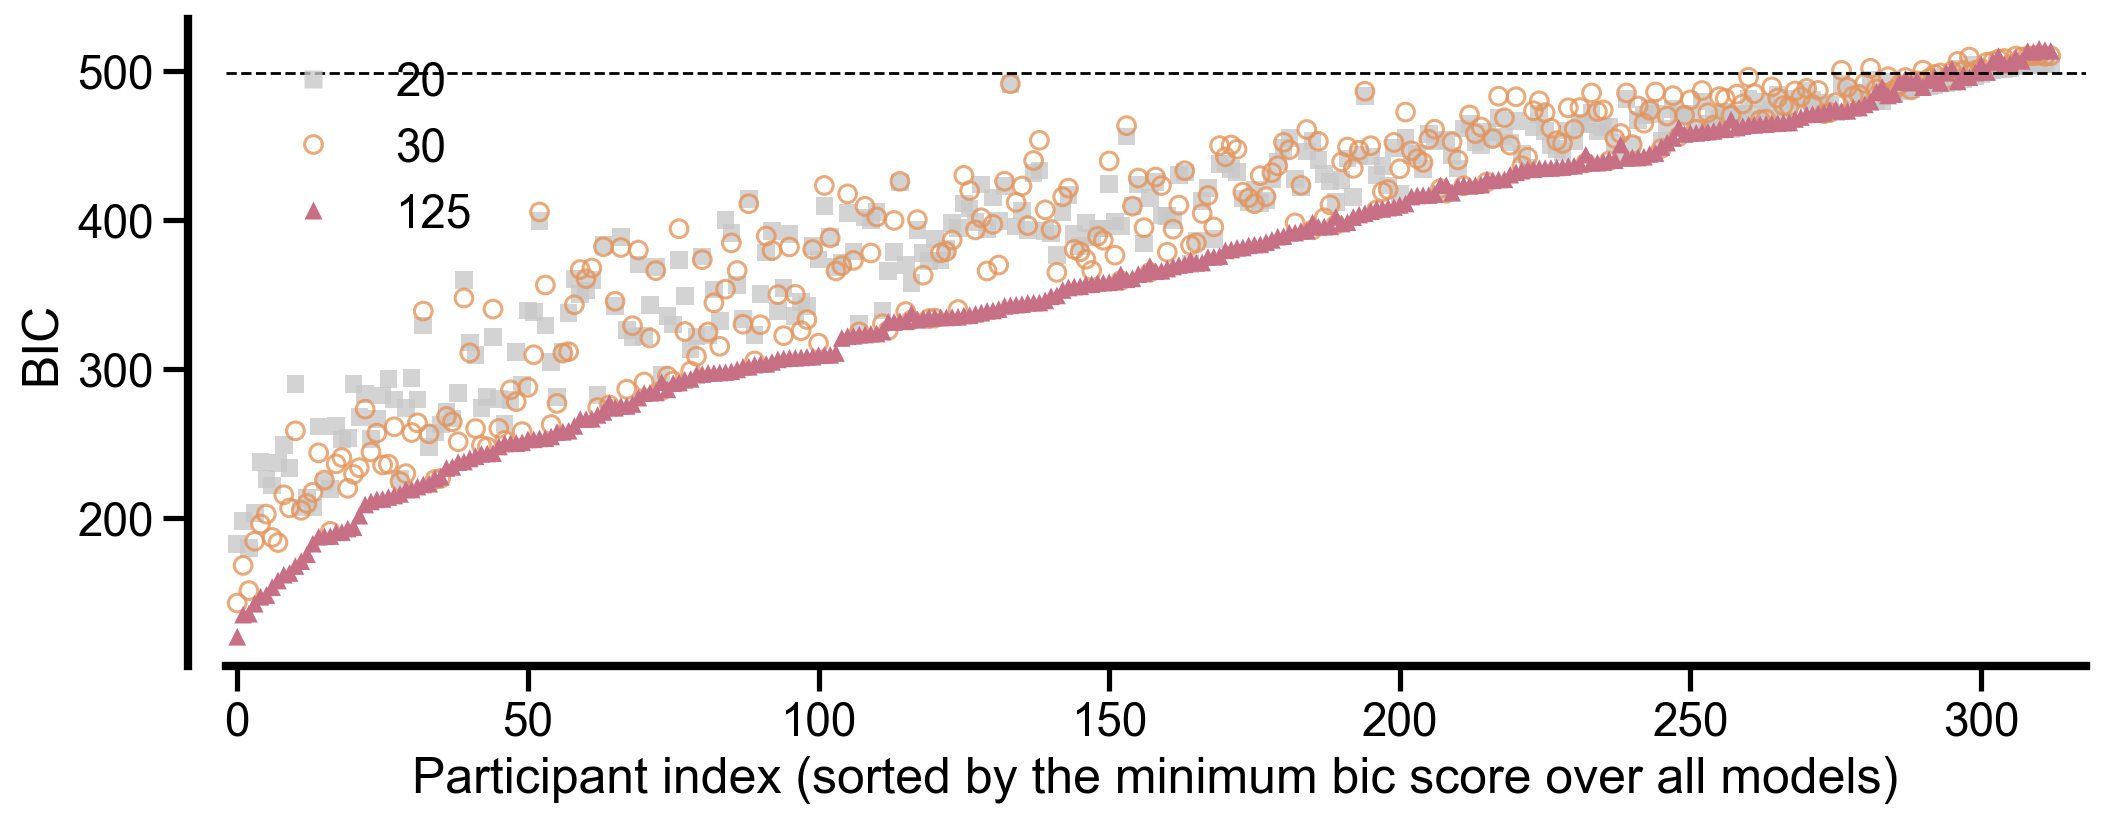

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4.2))
model_compare_per_participant(ax, data_set, models, 
                              method='map', cr='bic', 
                              n_data=3*(60+60))
plt.savefig(f'../figures/{data_set}/Fig5A1_model_cmp.pdf', dpi=dpi)
    

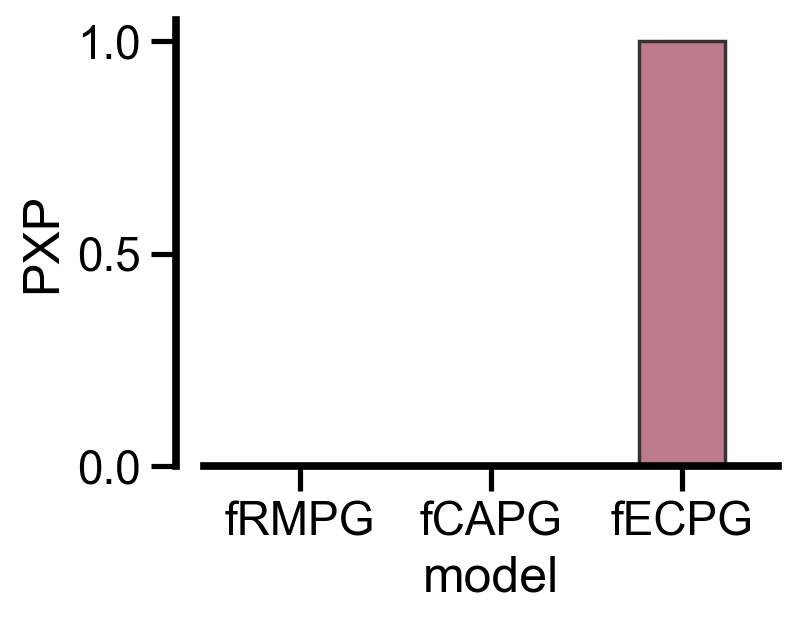

In [4]:
_, pxp = get_llh_score(data_set, models, method=method, 
                        if_bms=True, use_bic=True)
fig, ax = plt.subplots(1, 1, figsize=(3.7, 2.9))
sns.barplot(y='pxp', x='model', data=pxp,
            hue='model', hue_order=models,
            edgecolor=[.2]*3, lw=1.25, width=.45,
            palette=[eval(m).color for m in models])
ax.spines['left'].set_position(('axes',-0.05))
for pos in ['bottom', 'left']: ax.spines[pos].set_linewidth(2.75)
ax.set_xticks(range(len(models)))
ax.set_xticklabels([eval(m).name for m in models])
ax.set_yticks([0, .5, 1.])
ax.set_ylabel('PXP')
plt.savefig(f'../figures/{data_set}/Fig5B_pxp.pdf', dpi=dpi)


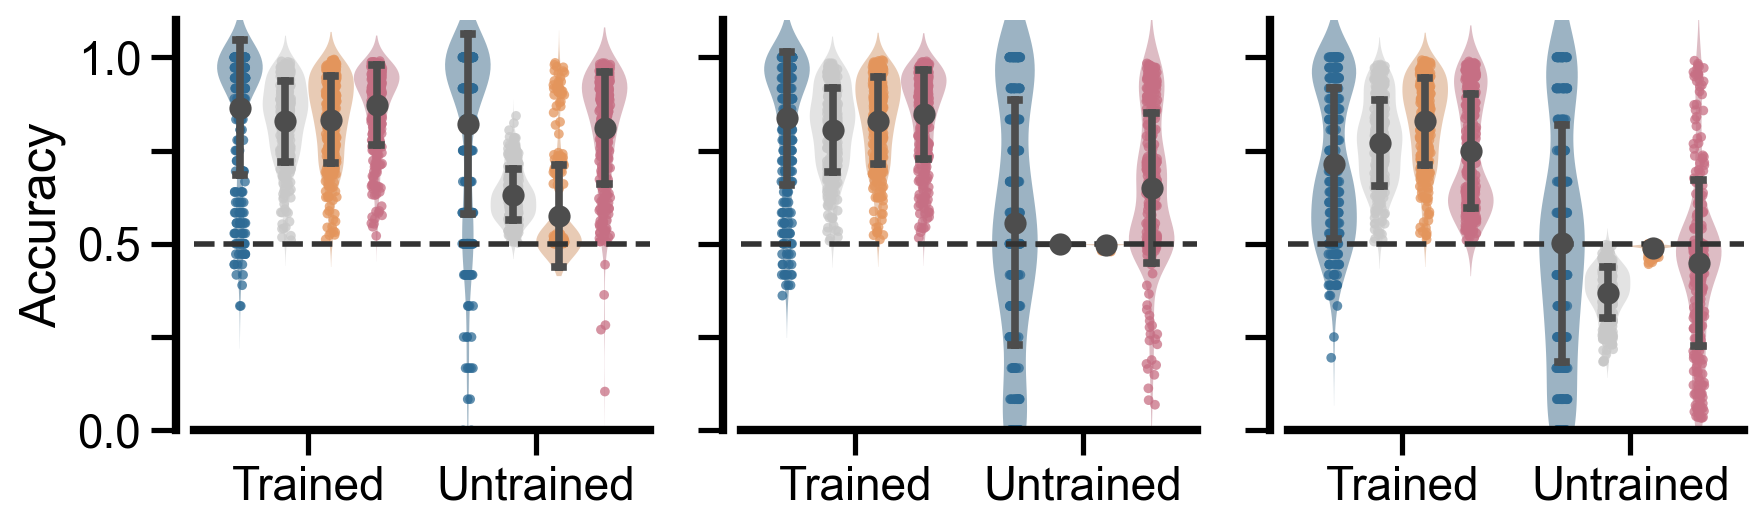

In [5]:
models = ['rmPG_fea', 'caPG_fea', 'ecPG_fea'] 
fig, axs = plt.subplots(1, 3, figsize=(10, 4.), sharey=True)
generalize_exp2(axs, 'exp2', ['human']+models, method='map')
for ax in axs: 
    ax.set_box_aspect(.9)
    ax.set_ylim([0, 1.1])
plt.savefig(f'../figures/{data_set}/Fig5C_transfer_cond.pdf', dpi=dpi)

In [6]:
def viz_lc_cond(exp, agents, method='mle'):
    data = [] 
    conds = ['cons', 'cont', 'conf']
    for agent in agents:
        df = pd.read_csv(f'{pth}/../analyses/{exp}/{agent}/{method}-base.csv')
        df['agent'] = agent
        data.append(df)
    data = pd.concat(data, axis=0)
    data['block_type'] = data['block_type']

    nr, nc = len(agents), 1
    fig, axs = plt.subplots(nr, nc, figsize=(4.8, 2.3*nr), sharey=True, sharex=True)
    for i, agent in enumerate(agents):
        ax = axs[i]
        sel_data = data.query(f'group in ["trained", "control"] & agent=="{agent}"')
        sel_data = sel_data.groupby(by=['sub_id', 'tps', 'stage',
                    'agent', 'block_type']).mean(numeric_only=True).reset_index()
        sel_data['tps'] = sel_data.apply(
                lambda x: x['tps']+10 if x['stage']=='test' else x['tps'], axis=1)
        sns.lineplot(x='tps', y='acc', data=sel_data, 
                    err_style='bars', err_kws={'capsize': 3, 'elinewidth':2},
                    hue='block_type', hue_order=conds, alpha=.7,
                    palette=viz.Pal_type, lw=3,
                    errorbar='se', ax=ax)
        ax.vlines(x=10, ymin=.4, ymax=1, color='k', ls='--', lw=1.5)
        ax.set_xticks([0, 5, 10, 15])
        ax.set_xticklabels(['1', '6', '11', '16'])
        ax.set_xlabel('')
        ax.set_ylabel('Acc. (%)')
        ax.set_ylim([.4, 1])
        ax.spines['left'].set_position(('axes',-0.05))
        ax.set_title(f'{eval(agents[i]).name}')
        ax.get_legend().remove()
    fig.tight_layout()

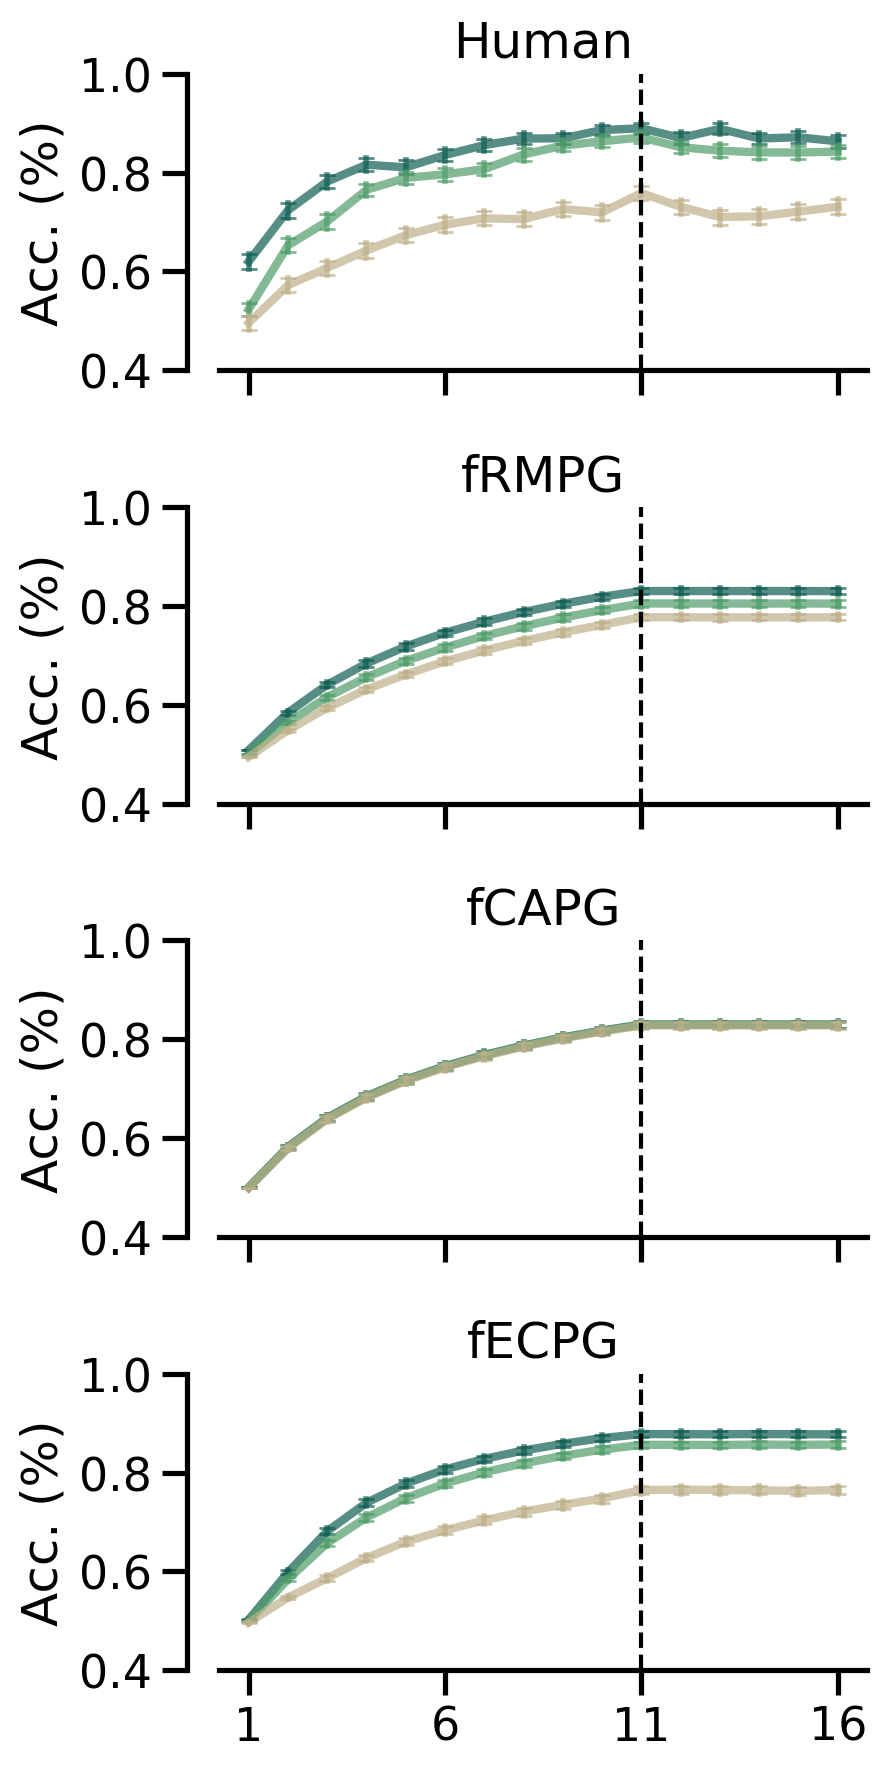

In [11]:
viz_lc_cond(exp, agents=['human']+agents, method=method)
plt.savefig(f'../figures/{exp}/Fig5D_lr_cond.pdf', dpi=dpi)
    